Lab Experiment 5: Support Vector Machine (SVM) using the Iris dataset

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values in dataset:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

🔹 SVM (linear kernel) Accuracy: 0.97


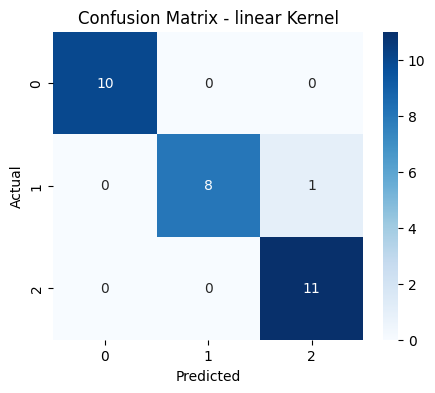


Classification Report (linear Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


🔹 SVM (rbf kernel) Accuracy: 1.00


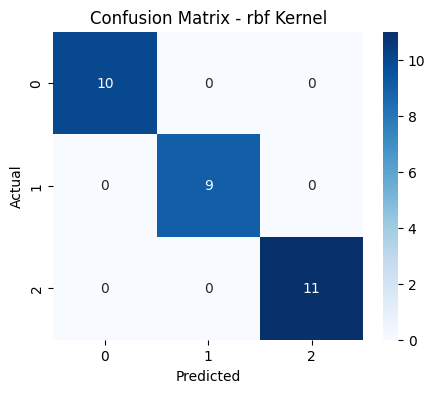


Classification Report (rbf Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔹 SVM (poly kernel) Accuracy: 0.97


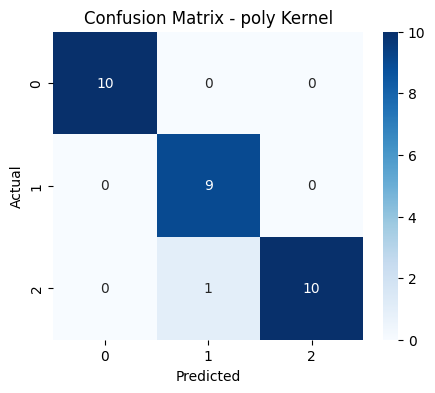


Classification Report (poly Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



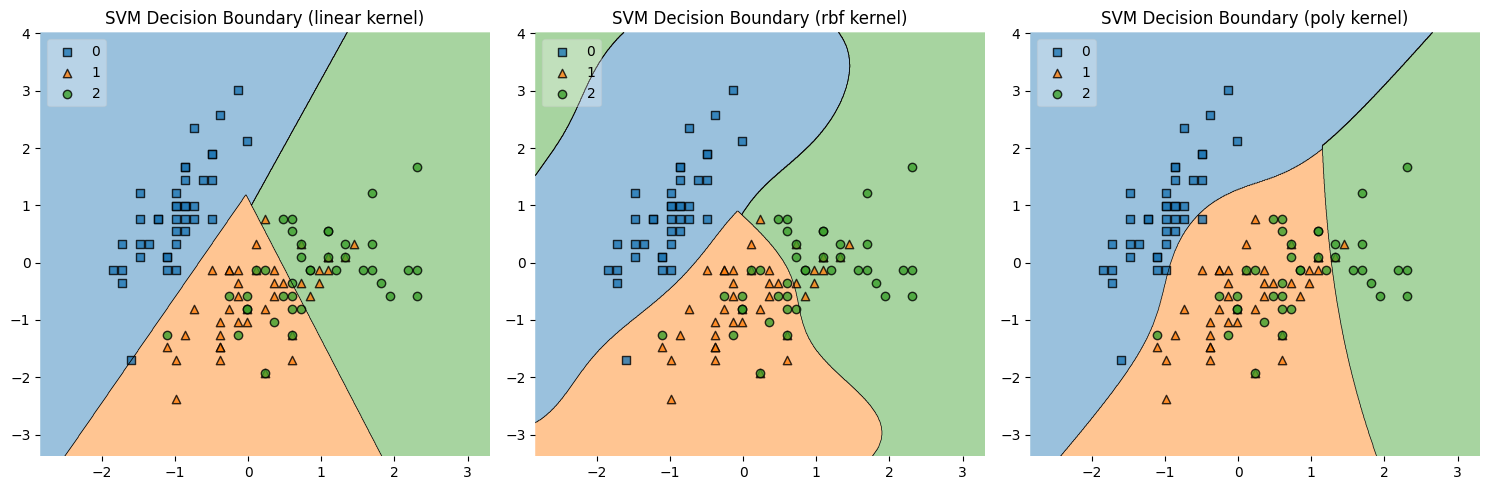

In [2]:
# 📌 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Load the dataset
df = pd.read_csv('Iris.csv')

# 📌 Display first 5 rows
print(df.head())

# 📌 Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# 📌 Encode the categorical target variable (Species)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# 📌 Split features (X) and target variable (y)
X = df.iloc[:, 1:5].values  # Selecting only numerical columns (ignore 'Id' column)
y = df.iloc[:, 5].values  # Encoded species

# 📌 Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Define different SVM classifiers with different kernels
kernels = ['linear', 'rbf', 'poly']
models = {}

for kernel in kernels:
    # Train the SVM model
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    models[kernel] = model

    # Make predictions
    y_pred = model.predict(X_test)
    
    # 📌 Print accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 SVM ({kernel} kernel) Accuracy: {acc:.2f}")
    
    # 📌 Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.show()
    
    # 📌 Print classification report
    print(f"\nClassification Report ({kernel} Kernel):\n", classification_report(y_test, y_pred))

# 📌 Decision Boundary Visualization (First 2 features only)
from mlxtend.plotting import plot_decision_regions

# Use only two features for 2D visualization
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

plt.figure(figsize=(15, 5))

for i, kernel in enumerate(kernels):
    plt.subplot(1, 3, i+1)
    model = SVC(kernel=kernel, random_state=42).fit(X_train_vis, y_train_vis)
    plot_decision_regions(X_train_vis, y_train_vis, clf=model, legend=2)
    plt.title(f"SVM Decision Boundary ({kernel} kernel)")

plt.tight_layout()
plt.show()
